# **Project Name - Credit Data Fraud Detection**

##Problem Statement:
##Problem Objective:
##Our Goals:
* Understand the little distribution of the "little" data that was provided to us.
* Check the Data ratio of "Fraud" and "Non-Fraud" transactions. 

* Determine the Classifiers we are going to use and decide which one has a higher accuracy.

##Understanding the Data:
####Feature Details:
* PCA Transformation: The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) except for time and amount.

* Scaling: Keep in mind that in order to implement a PCA transformation features need to be previously scaled. (In this case, assuming all  the V features have been scaled )



Importing the required libiraries 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn

Mounted at /content/drive/


Loading the Data as Pandas DataFrame from .CSV 

In [ ]:
# Uploading information
new_card1= pd.read_csv('/content/drive/MyDrive/creditcard.csv')
new_card1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
new_card1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
new_card1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

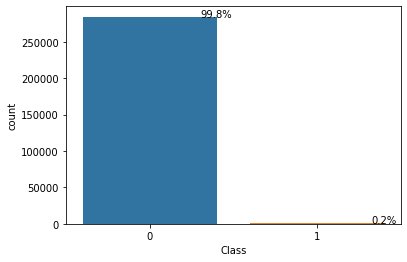

In [ ]:
ax=sns.countplot(x='Class',data=new_card1)
total = float(len(new_card1))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

##Understanding and making sense of the the Data

* The shape of data has 284807 rows and 31 columns (features).

* The mean of the Amount and Time vary lot compared to others Fetaures , so we need to scale the data .

* There are not Null Values in the Data and all variables are of float and int type, so this data is easy to handle for modeling.

* Most of the transactions were Non-Fraud (99.8%) of the time, while Fraud transactions occurs (0.2%) of the time in the dataframe.

* We have the Imbalanced Data which can lead our model to be baised if we train our model with Dataset , we will work on balancing the dataset with oversampling techniques.

In [ ]:
X= new_card1.drop(columns='Class', axis=1)
y= new_card1['Class'] 

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

(568630, 31)

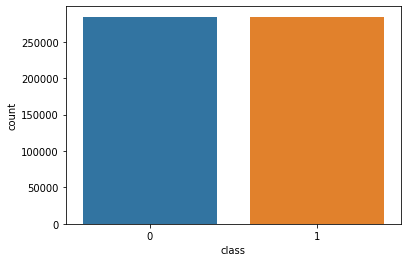

In [ ]:
#merging the data and Ploting the Data distribution
ovr=X
ovr['class']=y
sns.countplot(x='class',data=ovr)
ovr.shape

In [ ]:
ovr.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,...,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.0
mean,87774.128544,-2.483073,1.917791,-3.650718,2.328289,-1.632920,-0.716286,-2.934022,0.271952,-1.333602,...,0.395978,-0.008677,-0.002314,-0.054969,0.026860,0.028738,0.080518,0.041072,95.445517,0.5
std,48143.624754,5.464109,3.640031,6.162448,3.145339,4.140571,1.707676,5.722638,4.976515,2.230098,...,2.862012,1.168970,1.011294,0.540673,0.613503,0.448690,0.952686,0.418832,220.051298,0.5
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,45933.534585,-3.057845,-0.096982,-5.227181,-0.055537,-1.826673,-1.550662,-3.246172,-0.197418,-2.329195,...,-0.158882,-0.499515,-0.224068,-0.385102,-0.303053,-0.267396,-0.067769,-0.057288,3.320751,0.0
50%,80130.500000,-0.818980,1.016919,-1.551732,1.484617,-0.445214,-0.692898,-0.753480,0.169112,-0.810308,...,0.162025,0.021558,-0.026393,-0.007725,0.044725,-0.006541,0.058081,0.036628,25.000000,0.5
75%,134693.384613,0.818679,2.889421,0.265483,4.343014,0.427327,0.023896,0.185542,0.855505,0.078346,...,0.648219,0.527433,0.188363,0.340201,0.367872,0.308277,0.431919,0.213363,99.990000,1.0
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.0


## Balancing the Datset:

* One approach to addressing imbalanced datasets is to oversample the minority class. We are Using **SMOTE (Synthetic Minority Oversampling Technique)** .

* SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

* The way we will under sample the dataset will be by creating a 50/50 ratio. This will be done by randomly selecting "x" amount of sample from the majority class, being "x" the total number of records with the minority class.

* After performing SMOTE the size of Dataset is 568630 with 50% distribution of "Fraud" and "Non-Fraud" Data.


In [ ]:
Fea=ovr.iloc[:,0:30]
x= ovr.drop(columns='class', axis=1)
Y= ovr['class'] 

In [ ]:
Fea

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,21215.200465,-17.167069,9.871723,-23.947694,11.816135,-9.997253,-2.544364,-17.456741,2.018411,-6.254582,...,0.998910,-2.332443,0.958273,1.266793,-1.052909,0.071479,0.675664,2.101698,-1.423170,1.000000
568626,148038.910379,-0.043467,3.648825,-5.766697,5.321216,1.466033,-1.865970,-1.254952,0.406993,-3.474689,...,0.436330,0.315529,-0.718700,-0.279385,-0.132473,0.424705,0.111773,0.681801,0.422197,0.693900
568627,35893.834934,-2.903704,3.901832,-4.176917,5.588017,-3.562737,-1.211690,-6.254937,2.273836,-4.675877,...,0.947458,1.579832,0.874073,-0.149700,0.006001,0.016349,0.400041,0.991989,0.527259,6.195058
568628,96090.262609,-11.655495,8.979185,-12.571581,7.166544,-9.321662,0.386807,-17.430073,-8.107967,-5.103741,...,3.000152,-5.194154,1.810384,1.448596,0.084005,-0.492481,-0.381994,-1.873124,-0.316457,1.362575


In [ ]:
print(max(Fea['V1']))
print(min(Fea['V1']))

2.45492999121121
-56.407509631329


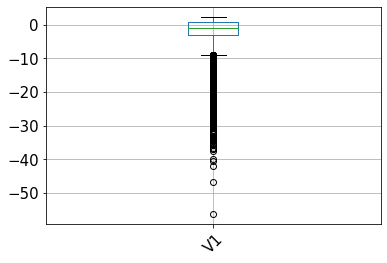

In [ ]:
from seaborn.categorical import boxplot
z=Fea.boxplot(column=['V1'],grid=True,fontsize=15,rot=45)

In [ ]:
for col in Fea.columns:
  q1=Fea[col].quantile(0.25)
  q3=Fea[col].quantile(0.75)
  IQR=q3-q1
  upper_limit = Fea[col][~(Fea[col]>(q3+1.5*IQR))].max()
  lower_limit = Fea[col][~(Fea[col]<(q1-1.5*IQR))].min()
  Fea[col] = np.where(Fea[col] > upper_limit, upper_limit,np.where(Fea[col] < lower_limit,lower_limit,Fea[col]))




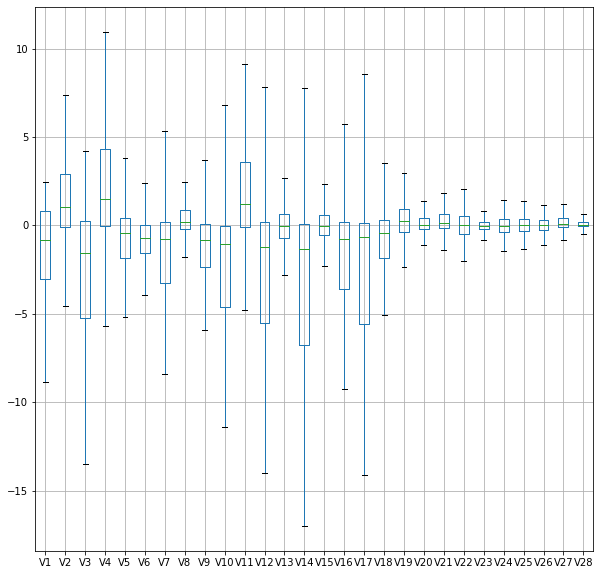

In [ ]:
Fea.iloc[:,1:29].boxplot(figsize=(10,10))
plt.show()

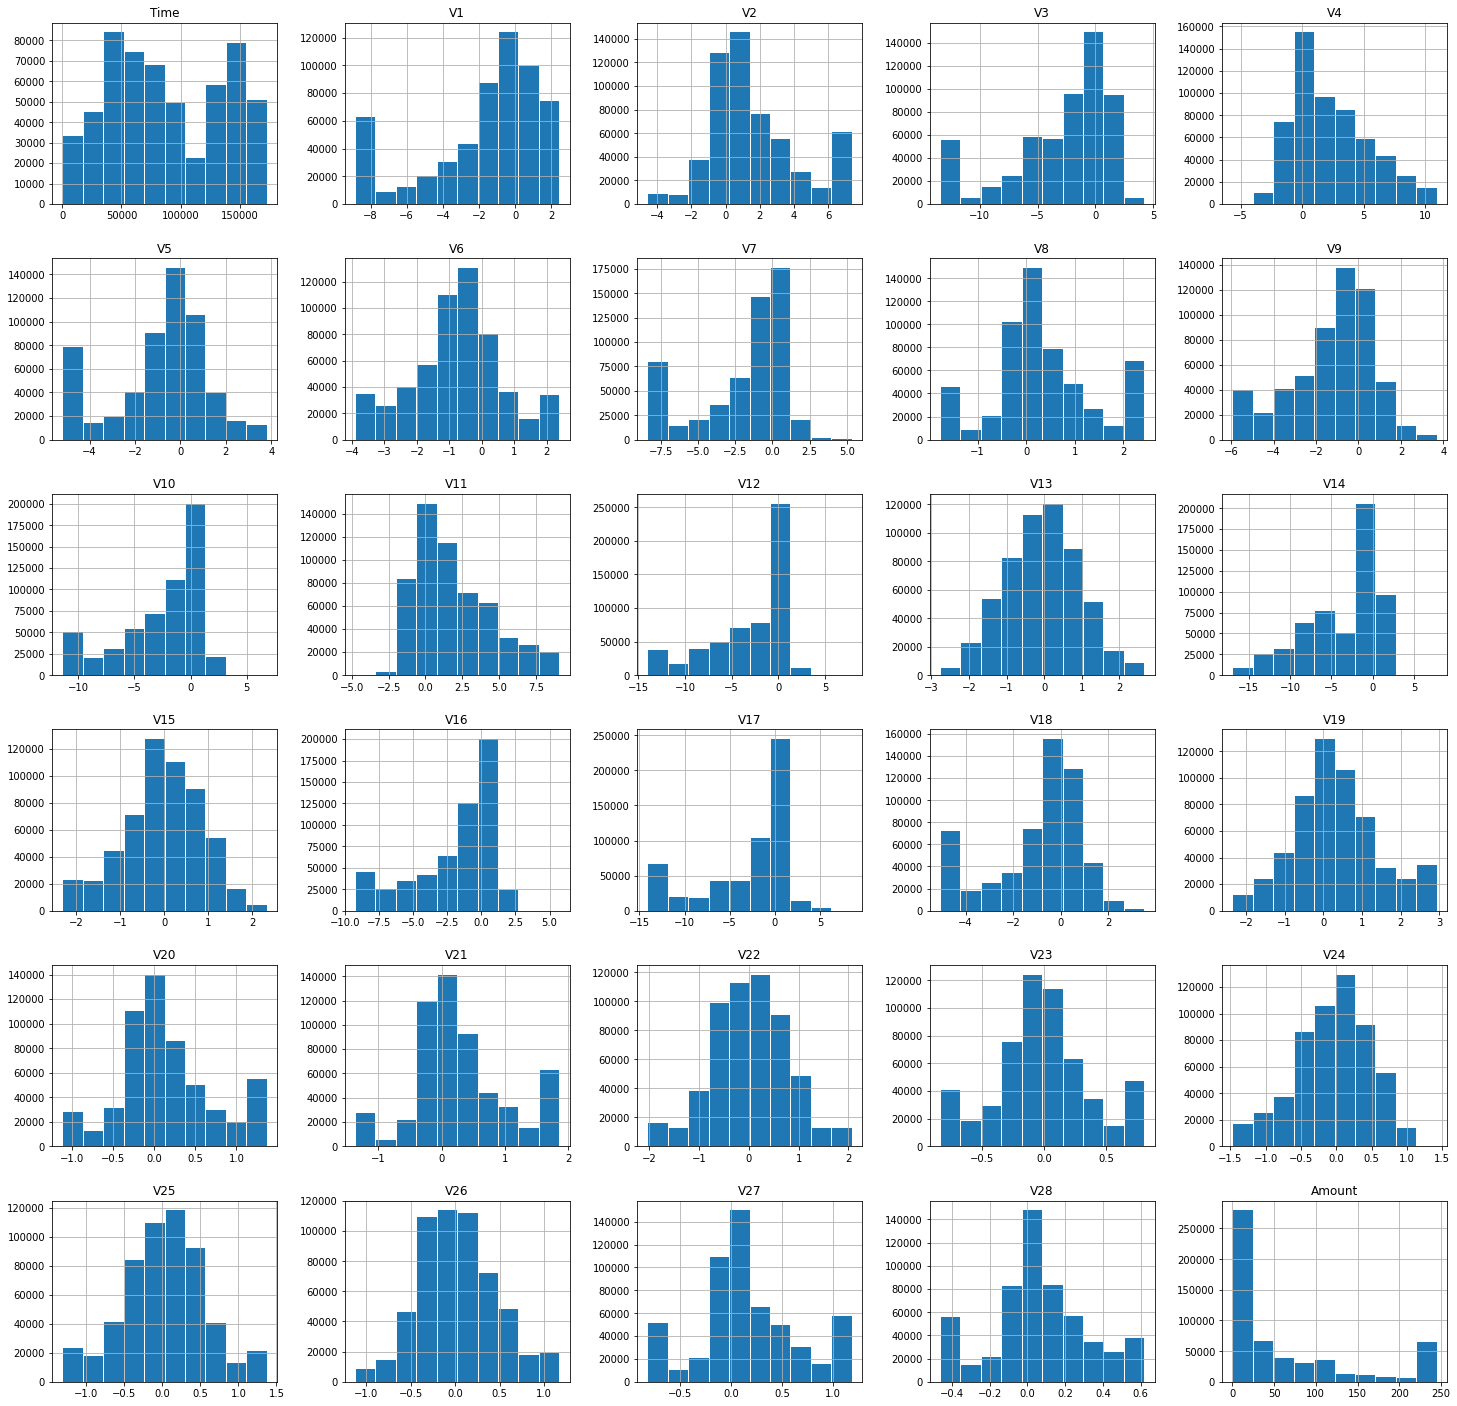

In [ ]:
#checking data distribution of each feature or column 

Fea.hist(figsize=(25,25), ec='w')
plt.show()

In [ ]:
'''upper_limit = Fea[~(Fea>(q3+1.5*IQR))].max()
print(upper_limit)

lower_limit = Fea[~(Fea<(q1-1.5*IQR))].min()
print(lower_limit)
Fea = np.where(Fea > upper_limit, upper_limit,np.where(Fea < lower_limit,lower_limit,Fea))


def impute_outliers_IQR(Fea):

   q1=Fea.quantile(0.25)

   q3=Fea.quantile(0.75)

   IQR=q3-q1

   upper_limit = Fea[~(Fea>(q3+1.5*IQR))].max()


   lower_limit = Fea[~(Fea<(q1-1.5*IQR))].min()

   Fea = np.where(Fea > upper_limit, upper_limit,np.where(Fea < lower_limit,lower_limit,Fea))

   return Fea
q1=Fea.quantile(0.25)

q3=Fea.quantile(0.75)

IQR=q3-q1



from feature_engine.outliers import Winsorizer
#https://feature-engine.readthedocs.io/en/1.0.x/outliers/Winsorizer.html (reference to understand winsorizer)
capper = Winsorizer(capping_method='gaussian', tail='both')
capper.fit(Fea)
Fea= capper.transform(Fea)'''

"upper_limit = Fea[~(Fea>(q3+1.5*IQR))].max()\nprint(upper_limit)\n\nlower_limit = Fea[~(Fea<(q1-1.5*IQR))].min()\nprint(lower_limit)\nFea = np.where(Fea > upper_limit, upper_limit,np.where(Fea < lower_limit,lower_limit,Fea))\n\n\ndef impute_outliers_IQR(Fea):\n\n   q1=Fea.quantile(0.25)\n\n   q3=Fea.quantile(0.75)\n\n   IQR=q3-q1\n\n   upper_limit = Fea[~(Fea>(q3+1.5*IQR))].max()\n\n\n   lower_limit = Fea[~(Fea<(q1-1.5*IQR))].min()\n\n   Fea = np.where(Fea > upper_limit, upper_limit,np.where(Fea < lower_limit,lower_limit,Fea))\n\n   return Fea\nq1=Fea.quantile(0.25)\n\nq3=Fea.quantile(0.75)\n\nIQR=q3-q1\n\n\n\nfrom feature_engine.outliers import Winsorizer\n#https://feature-engine.readthedocs.io/en/1.0.x/outliers/Winsorizer.html (reference to understand winsorizer)\ncapper = Winsorizer(capping_method='gaussian', tail='both')\ncapper.fit(Fea)\nFea= capper.transform(Fea)"

In [ ]:
Fea.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,...,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000
mean,87774.128544,-1.726100,1.630247,-3.068439,2.319296,-0.931415,-0.764661,-1.975408,0.344459,-1.257896,...,0.143034,0.296666,0.016959,-0.014508,-0.052563,0.028905,0.025696,0.157962,0.061035,64.561762
std,48143.624754,3.251179,2.643241,4.470981,3.119350,2.167457,1.442739,3.121614,1.084767,1.992460,...,0.591667,0.768424,0.776264,0.398431,0.530233,0.553617,0.436257,0.510922,0.267123,80.929050
min,0.000000,-8.872477,-4.576380,-13.466075,-5.683171,-5.207595,-3.912489,-8.393734,-1.776798,-5.940412,...,-1.124172,-1.369519,-2.039916,-0.842670,-1.472967,-1.309428,-1.130888,-0.817257,-0.463259,0.000000
25%,45933.534585,-3.057845,-0.096982,-5.227181,-0.055537,-1.826673,-1.550662,-3.246172,-0.197418,-2.329195,...,-0.188228,-0.158882,-0.499515,-0.224068,-0.385102,-0.303053,-0.267396,-0.067769,-0.057288,3.320751
50%,80130.500000,-0.818980,1.016919,-1.551732,1.484617,-0.445214,-0.692898,-0.753480,0.169112,-0.810308,...,0.040040,0.162025,0.021558,-0.026393,-0.007725,0.044725,-0.006541,0.058081,0.036628,25.000000
75%,134693.384613,0.818679,2.889421,0.265483,4.343014,0.427327,0.023896,0.185542,0.855505,0.078346,...,0.435744,0.648219,0.527433,0.188363,0.340201,0.367872,0.308277,0.431919,0.213363,99.990000
max,172792.000000,2.454930,7.368893,4.226108,10.940404,3.808260,2.385211,5.332195,2.434777,3.689300,...,1.371652,1.858862,2.067840,0.806944,1.425953,1.374229,1.171708,1.181447,0.619326,244.990279


## Feature Selection:

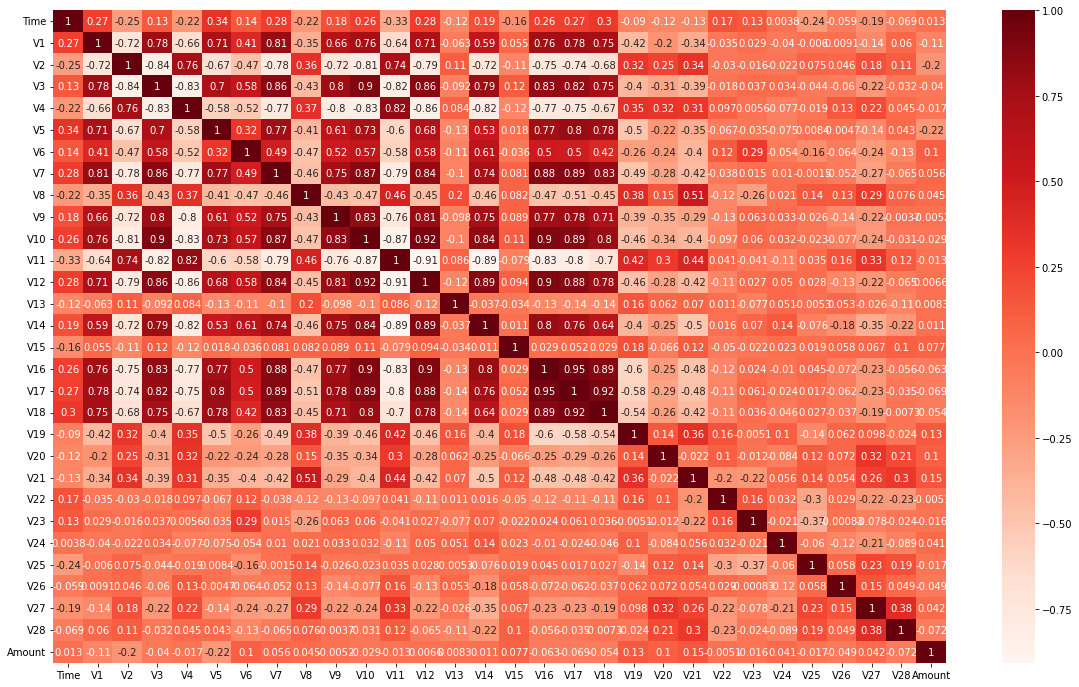

In [ ]:
plt.figure(figsize=(20,12))
correction= Fea.corr()
sns. heatmap(correction,annot=True ,cmap=plt.cm.Reds)
plt.show()

In [ ]:
# function measure corr between independent variables
def correlation(dt,thres):
  col_corr=set() #set() avoid dublicate entries
  corr_matrix= dt.corr()
  for i in range(len(corr_matrix)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>thres: # abs takes numbers regardless of sign 
        colval=corr_matrix.columns[i]
        col_corr.add(colval)
  return col_corr
# in the above function if we are taking postive corr > .70 we are getting our target class in the list so better to take .85 and then remove rest 2 seperately 


In [ ]:
corr_var= correlation(Fea, 0.75) #detect variable correlating more than 85% (both +ve and -ve) 
print(corr_var)

{'V3', 'V10', 'V4', 'V17', 'V16', 'V14', 'V7', 'V18', 'V9', 'V11', 'V12'}


# **Feature Selection**

We want to know if there are features that influence heavily in whether a specific transaction is a fraud. we are using **Correlation Matrix** to see which features have a high positive or negative correlation with regards to fraud transactions.

### Summary :

* Negative Correlations: V17, V14, V12, V3, V9, V22 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

* Positive Correlations: V2, V4, V11, V7, V16 and V18 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.


In [ ]:
Fea= Fea.drop(corr_var, axis=1) # remove highly correlated independent variables from train data
Fea

,Time,V1,V2,V5,V6,V8,V13,V15,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-1.359807,-0.072781,-0.338321,0.462388,0.098698,-0.991390,1.468177,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000
1,0.000000,1.191857,0.266151,0.060018,-0.082361,0.085102,0.489095,0.635558,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
2,1.000000,-1.358354,-1.340163,-0.503198,1.800499,0.247676,0.717293,2.328550,-2.261857,0.524980,0.247998,0.771679,0.806944,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,244.990279
3,1.000000,-0.966272,-0.185226,-0.010309,1.247203,0.377436,0.507757,-0.631418,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000
4,2.000000,-1.158233,0.877737,-0.407193,0.095921,-0.270533,1.345852,0.175121,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,21215.200465,-8.872477,7.368893,-5.207595,-2.544364,2.018411,0.927297,-0.413335,0.569154,0.998910,-1.369519,0.958273,0.806944,-1.052909,0.071479,0.675664,1.181447,-0.463259,1.000000
568626,148038.910379,-0.043467,3.648825,1.466033,-1.865970,0.406993,-0.691217,-0.467397,-1.655949,0.436330,0.315529,-0.718700,-0.279385,-0.132473,0.424705,0.111773,0.681801,0.422197,0.693900
568627,35893.834934,-2.903704,3.901832,-3.562737,-1.211690,2.273836,1.581450,0.786243,2.466068,0.947458,1.579832,0.874073,-0.149700,0.006001,0.016349,0.400041,0.991989,0.527259,6.195058
568628,96090.262609,-8.872477,7.368893,-5.207595,0.386807,-1.776798,0.699259,-0.085827,2.345626,1.371652,-1.369519,1.810384,0.806944,0.084005,-0.492481,-0.381994,-0.817257,-0.316457,1.362575


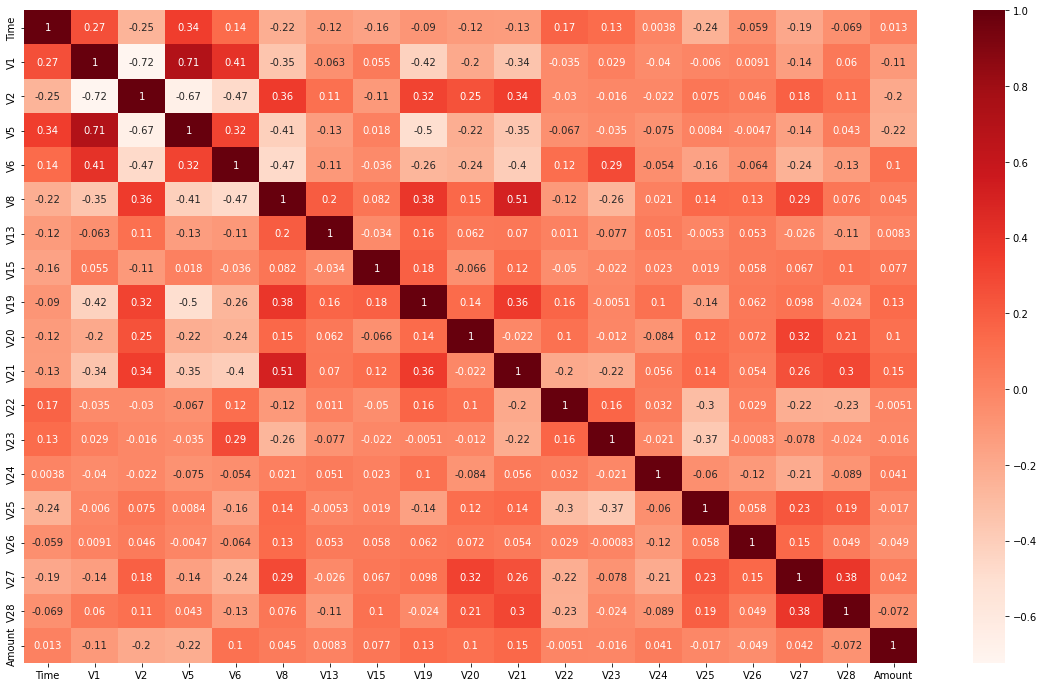

In [ ]:
plt.figure(figsize=(20,12))
cor=Fea.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.Reds)
plt.show()

# **MODEL BUILDING**

---
We will train different types of classifiers and decide which classifier will be more effective in detecting fraud transactions. Before we are spliting our data into training and testing sets and separate the features from the labels in 80:20 ratio.

### Logistic Regression
* 



### Random Forest
* 




### Naive Bayes
*  

In [ ]:
#apply train test to avoid overfitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(Fea,Y,test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((454904, 19), (113726, 19))

In [ ]:
X_test

,Time,V1,V2,V5,V6,V8,V13,V15,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
484657,83597.725520,-1.104704,2.992002,-1.504607,-1.815875,1.128237,-0.362432,-0.506336,0.395127,0.787434,0.784007,-0.442778,-0.228622,-0.405956,0.669664,0.763656,0.962704,0.485651,0.316592
409771,68207.000000,-8.872477,7.368893,-4.801176,2.385211,-1.776798,-1.909488,-0.226074,0.051576,-1.124172,1.858862,-2.039916,0.806944,-0.639435,0.263203,-0.108877,1.181447,0.619326,1.000000
419226,93856.388474,-7.127510,5.550438,-5.207595,-2.481980,2.434777,-0.053258,-1.714739,2.160150,-0.152012,1.858862,-0.247315,0.273192,0.653983,-0.670527,-0.172654,0.909386,0.131182,207.597886
89221,62481.000000,-3.285261,1.830862,-0.183567,-1.023974,-0.767343,0.048969,1.280313,-0.350383,1.227533,-0.965349,-0.858981,-0.069292,0.312418,0.401098,0.042005,0.668924,0.619326,89.990000
365095,26882.480892,-8.872477,7.368893,-5.207595,-3.912489,2.434777,0.426478,-0.019183,1.123591,1.371652,1.760492,-1.553144,-0.842670,0.132547,1.374229,-0.222920,1.181447,0.457260,99.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518178,102425.307929,-6.705849,7.019892,-4.784656,-0.184476,-1.776798,0.993854,-1.117969,2.934210,1.371652,-1.369519,2.067840,0.314504,-0.427582,-0.050843,0.134636,-0.113592,0.246917,86.336066
116382,74251.000000,1.113438,-0.072376,-1.045584,-0.003519,0.248335,-0.452586,-0.498211,0.006867,-0.171893,-0.007199,0.151712,0.021118,0.535634,0.348840,-0.437099,0.068309,0.027814,0.010000
183607,125875.000000,0.630970,1.998664,1.612403,0.617412,0.163967,0.275565,-0.030969,1.456835,0.348775,-0.425926,-1.018421,0.016877,-1.391339,-0.601272,0.095531,0.305999,0.062868,2.250000
21832,31883.000000,-3.558470,-2.394516,3.756548,-2.212701,0.221495,0.088440,0.133961,-0.864282,-0.635413,0.052609,0.353485,-0.842670,0.117743,0.497028,-0.330117,0.382582,-0.095999,21.010000


In [ ]:
X_test.to_csv('/content/drive/MyDrive/File_Name.csv',index = False)

# Bagging with XGboost

In [ ]:
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
model = BaggingRegressor(base_estimator=xgb.XGBRegressor(objective='reg:squarederror'))
model.fit(X_train, y_train)
pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, pred))
print((1-mean_squared_error(y_test, pred))*100)

0.05115943038995257
94.88405696100475


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier

model = BaggingRegressor(base_estimator=DecisionTreeClassifier(criterion='entropy', random_state=0) )
model.fit(X_train, y_train)
pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, pred))
print((1-mean_squared_error(y_test, pred))*100)

0.0015543499287761814
99.84456500712238


In [ ]:
pred1 = model.predict(X_train)
print(mean_squared_error(y_train, pred1))
print((1-mean_squared_error(y_train, pred1))*100)

0.05065843786299998
94.9341562137


# Stacking with LogisticRegression

## **MODEL1: LOGISTIC REGRESSION**

---





In [ ]:
#Logistic Regression without standardization
from sklearn.linear_model import LogisticRegression
model1= LogisticRegression()
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.8532085890649456

In [ ]:
#Logistic Regression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
model1 = make_pipeline(StandardScaler(), LogisticRegression()) #standardize first then fit model
model1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
#Accuracy of the model 
y_predicted=model1.predict(X_test)
model1.score(X_test, y_test)

0.8913089355116683

In [ ]:
model1.score(X_train, y_train)

0.8917551835112463

In [ ]:
model1.predict_proba(X_test)[:,1] 

array([0.60858421, 0.23776575, 0.98681383, ..., 0.22705591, 0.16916072,
       0.9999986 ])

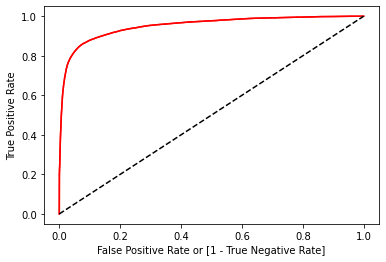

auc accuracy: 0.891576814972806


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds=roc_curve(y_test,model1.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_test,y_predicted)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

In [ ]:
#Confusion matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test, y_predicted)
conf

array([[52301,  4423],
       [ 7916, 49086]])

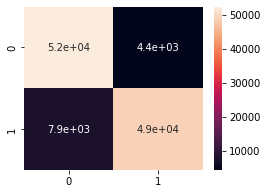

In [ ]:
#Confusion matrix visualization
plt.figure(figsize=(4,3))
sns.heatmap(conf, annot=True)


### **MODEL 2 # NAIVE BAYES MODEL**

In [ ]:
#Naive Bayes model
from sklearn. preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import MultinomialNB,GaussianNB
model2= GaussianNB()

In [ ]:
#model2= MultinomialNB()
model2= make_pipeline(StandardScaler(), GaussianNB()) #X_train will be normalized first the the data then fit the train model 
model2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

In [ ]:
print('Test:',model2.score(X_test, y_test)) # accuracy of the model
print('Train:',model2.score(X_train, y_train)) # accuracy of the model

y_predicted2=model2.predict(X_test)

Test: 0.8272602571091923
Train: 0.8270558183704694


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf2= confusion_matrix(y_test, y_predicted2)
conf2

array([[51439,  5285],
       [14360, 42642]])

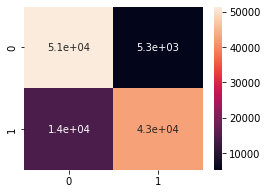

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(conf2, annot=True)

## **MODEL 3 # RANDOM FOREST**

In [ ]:
# Random forest 
from sklearn.ensemble import RandomForestClassifier 
model3= make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=10))
model3.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=10))])

In [ ]:
print('Test:',model3.score(X_test, y_test)) # Accuracy score
print('Train:',model3.score(X_train, y_train)) # Accuracy score

Test: 0.9996922427589118
Train: 0.9999934052019767


In [ ]:
y_predicted3= model3.predict(X_test)# Predicted values


In [ ]:
#confusion matrix
conf3= confusion_matrix(y_test, y_predicted3)
conf3

array([[56702,    22],
       [   13, 56989]])

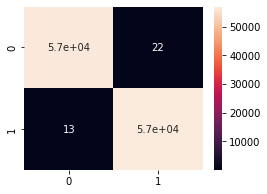

In [ ]:
#Confusion matrix Visualization 
plt.figure(figsize=(4,3))
sns.heatmap(conf3, annot=True)

# Deploying our ML Model in IBM Cloud

In [ ]:
#deploying the model
wml_credentials={
    "apikey":"t0zF_oDitq6kKOzu0Pj53E2QUVHw7pFBzMXftBj3YQzZ",
    "url":"https://us-south.ml.cloud.ibm.com"
}


In [ ]:
from ibm_watson_machine_learning import APIClient
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.
Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------------------------  ------------------------
ID                                    NAME                         CREATED
a5cf0e42-2b9e-441c-b836-7c82cb576a82  credit_card_fraud_detection  2022-04-14T21:28:45.068Z
1d2c2c8c-6ac8-428e-9bbf-539a04c3a4fc  Project                      2021-08-11T20:51:29.186Z
------------------------------------  ---------------------------  ------------------------


In [ ]:
SPACE_ID="a5cf0e42-2b9e-441c-b836-7c82cb576a82"
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [ ]:
MODEL_NAME = 'CreditFraud_Detection'
DEPLOYMENT_NAME = 'Sklearn_Deployment'
BEST_MODEL = model1

In [ ]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('default_py3.8')

# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: 'CreditFraud_Detection', 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

#Save model
model_details = wml_client.repository.store_model(
    model=BEST_MODEL, 
    meta_props=model_props, 
    training_data=X_train, 
    training_target=y_train
)

Note: Warnings!! :  Software specification default_py3.8 specified for the wml_model is deprecated and will be removed in the future. We recommend you use runtime-22.1-py3.9 instead. For details see Supported Frameworks https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [ ]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'class',
  'software_spec': {'id': 'ab9e1b80-f2ce-592c-a7d2-4f2344f77194',
   'name': 'default_py3.8'},
  'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
     'endpoint_url': 'not_applicable',
     'secret_access_key': 'not_applicable'},
    'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'Time', 'type': 'float64'},
      {'name': 'V1', 'type': 'float64'},
      {'name': 'V2', 'type': 'float64'},
      {'name': 'V5', 'type': 'float64'},
      {'name': 'V6', 'type': 'float64'},
      {'name': 'V8', 'type': 'float64'},
      {'name': 'V13', 'type': 'float64'},
      {'name': 'V15', 'type': 'float64'},
      {'name': 'V19', 'type': 'float64'},
      {'name': 'V20', 'type': 'float64'},
      {'name': 'V21', 'type': 'float64'},
      {'name': 'V22', 'type': 'float64'},
      {'name': 'V23', 'type': 'float64'},
      {'name': 'V24', 'type': 'float64'},
      {'name': 'V25', '

In [ ]:
model_uid = wml_client.repository.get_model_uid(model_details); model_uid


This method is deprecated, please use get_model_id()


'1a6f43e7-9239-490f-9a9d-ca80adfb3737'

In [ ]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_uid, 
    meta_props=deployment_props 
)

# Output result
deployment



#######################################################################################

Synchronous deployment creation for uid: '1a6f43e7-9239-490f-9a9d-ca80adfb3737' started

#######################################################################################


initializing
Note: Software specification default_py3.8 is deprecated. Use runtime-22.1-py3.9 software specification instead. For details, see https://dataplatform.cloud.ibm.com/docs/content/wsj/wmls/wmls-deploy-python-types.html?context=cpdaas.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='dbdabd2a-0e37-4b36-8ef1-2a36e25a15cc'
------------------------------------------------------------------------------------------------




{'entity': {'asset': {'id': '1a6f43e7-9239-490f-9a9d-ca80adfb3737'},
  'custom': {},
  'deployed_asset_type': 'model',
  'hardware_spec': {'id': 'e7ed1d6c-2e89-42d7-aed5-863b972c1d2b',
   'name': 'S',
   'num_nodes': 1},
  'name': 'Sklearn_Deployment',
  'online': {},
  'space_id': 'a5cf0e42-2b9e-441c-b836-7c82cb576a82',
  'status': {'online_url': {'url': 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/dbdabd2a-0e37-4b36-8ef1-2a36e25a15cc/predictions'},
   'serving_urls': ['https://us-south.ml.cloud.ibm.com/ml/v4/deployments/dbdabd2a-0e37-4b36-8ef1-2a36e25a15cc/predictions'],
   'state': 'ready'}},
 'metadata': {'created_at': '2022-04-14T22:16:46.650Z',
  'id': 'dbdabd2a-0e37-4b36-8ef1-2a36e25a15cc',
  'modified_at': '2022-04-14T22:16:46.650Z',
  'name': 'Sklearn_Deployment',
  'owner': 'IBMid-664002D7B3',
  'space_id': 'a5cf0e42-2b9e-441c-b836-7c82cb576a82'},
 'system': {'warnings': [{'id': 'Deprecated',
    'message': 'Software specification default_py3.8 is deprecated. Use runt

In [ ]:
deployment_uid = wml_client.deployments.get_uid(deployment)
payload = {"input_data":
           [
               {"fields":X_test.columns.to_numpy().tolist(), "values":X_test.to_numpy().tolist()}
           ]
          }
result = wml_client.deployments.score(deployment_uid, payload); 
result

{'predictions': [{'fields': ['prediction', 'probability'],
   'values': [[1, [0.09051674223710371, 0.9094832577628963]],
    [1, [0.0038275827028652065, 0.9961724172971348]],
    [1, [0.00014913639801661382, 0.9998508636019834]],
    [1, [0.14845451575621116, 0.8515454842437888]],
    [1, [0.2818915445525698, 0.7181084554474302]],
    [0, [0.9016271078998163, 0.09837289210018375]],
    [1, [0.13807742307331494, 0.8619225769266851]],
    [0, [0.8940449631004859, 0.10595503689951415]],
    [1, [0.0004607444417475959, 0.9995392555582524]],
    [1, [0.16085274239780611, 0.8391472576021939]],
    [0, [0.9386989526572839, 0.06130104734271608]],
    [0, [0.9801149322226197, 0.01988506777738028]],
    [1, [0.08775784890917471, 0.9122421510908253]],
    [0, [0.8041580698867917, 0.1958419301132083]],
    [1, [0.14177421143185054, 0.8582257885681495]],
    [1, [0.01897413101872847, 0.9810258689812715]],
    [0, [0.9890102407364543, 0.01098975926354569]],
    [0, [0.9650701053555572, 0.03492989464

In [ ]:
#!pip install ibm-watson-machine-learning